<a href="https://colab.research.google.com/github/DhruvGarg2003/Topsis2/blob/main/topsis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results:
     Model  BLEU  ROUGE  Closeness  Rank
0  Model A  0.75   0.88   0.000000   3.0
1  Model B  0.82   0.92   1.000000   1.0
2  Model C  0.79   0.90   0.535532   2.0


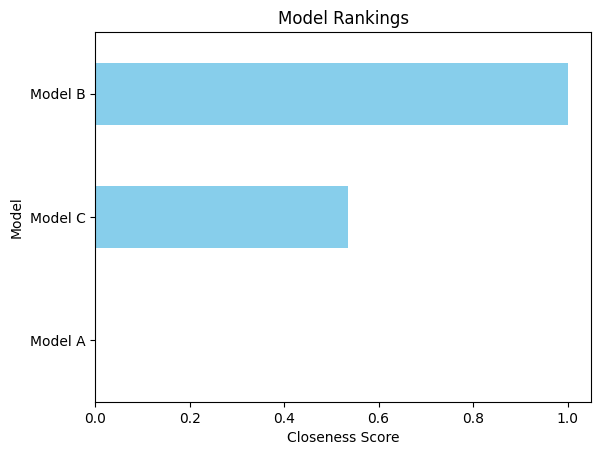

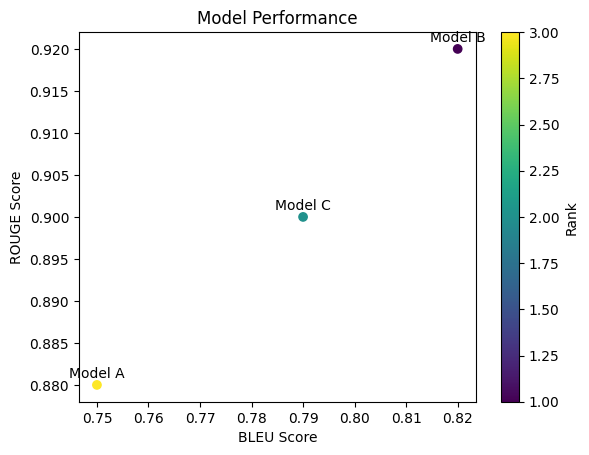

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {
    'Model': ['Model A', 'Model B', 'Model C'],
    'BLEU': [0.75, 0.82, 0.79],
    'ROUGE': [0.88, 0.92, 0.90],
}

df = pd.DataFrame(data)

# Normalize data
normalized_data = df[['BLEU', 'ROUGE']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Create weights for each criterion
weights = [0.5, 0.5]  # Adjust weights based on the importance of each criterion

# Calculate weighted normalized decision matrix
weighted_normalized_matrix = normalized_data * weights

# Define ideal and negative-ideal solutions
ideal_solution = np.max(weighted_normalized_matrix, axis=0)
negative_ideal_solution = np.min(weighted_normalized_matrix, axis=0)

# Calculate Euclidean distances to ideal and negative-ideal solutions
distance_to_ideal = np.linalg.norm(weighted_normalized_matrix - ideal_solution, axis=1)
distance_to_negative_ideal = np.linalg.norm(weighted_normalized_matrix - negative_ideal_solution, axis=1)

# Calculate performance scores
closeness = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)

# Rank models based on closeness
df['Closeness'] = closeness
df['Rank'] = df['Closeness'].rank(ascending=False)

# Display results
print("Results:")
print(df)

# Plot bar chart for rankings
fig, ax = plt.subplots()
df[['Model', 'Closeness']].sort_values(by='Closeness').plot(kind='barh', x='Model', y='Closeness', ax=ax, legend=False, color='skyblue')
ax.set_title('Model Rankings')
ax.set_xlabel('Closeness Score')
ax.set_ylabel('Model')

# Plot scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(df['BLEU'], df['ROUGE'], c=df['Rank'], cmap='viridis', marker='o')
ax.set_title('Model Performance')
ax.set_xlabel('BLEU Score')
ax.set_ylabel('ROUGE Score')
for i, txt in enumerate(df['Model']):
    ax.annotate(txt, (df['BLEU'][i], df['ROUGE'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Rank')

# Show plots
plt.show()